In [78]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator

In [79]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_17.1/depth_estimation.csv")
depth_whole

index         x         y          z  Unnamed: 4
0        18  0.791167 -0.233557  15.677278         NaN
1        18  0.713301 -0.228339  16.129553         NaN
2        18  0.760794 -0.232558  16.154665         NaN
3        18  0.820915 -0.225904  15.668366         NaN
4        18  0.797071 -0.206710  15.638885         NaN
...     ...       ...       ...        ...         ...
6875    207  1.074600 -0.221003  19.898342         NaN
6876    207  1.009008 -0.192828  19.752329         NaN
6877    207  0.810599 -0.163048  19.778057         NaN
6878    207  0.986432 -0.127108  20.057594         NaN
6879    207  1.003356 -0.179792  19.583469         NaN

[6880 rows x 5 columns]

In [80]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

cond = (z < 40)&(z>5)
x = x[cond]
y = y[cond]
z = z[cond]
index = index[cond]


In [81]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [82]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

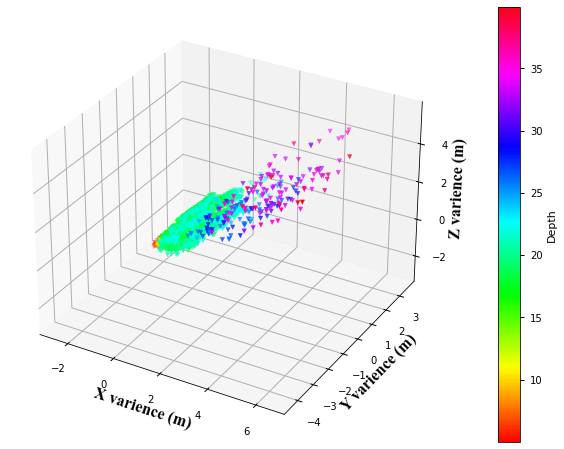

In [83]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X varience (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y varience (m)', font=font1)
ax.set_zlabel('Z varience (m)', font=font1)
fig.colorbar(p2,label="Depth")

In [84]:

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 15,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 12,
}

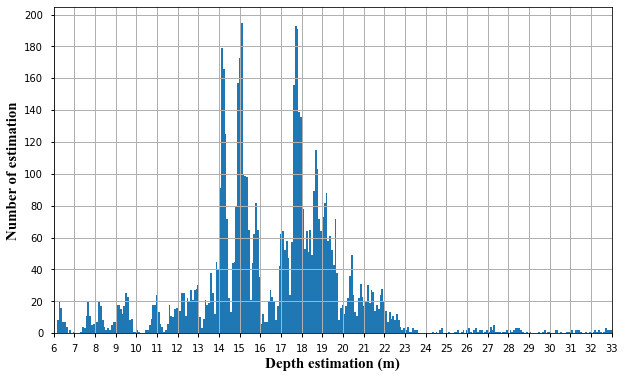

In [92]:
fig = plt.figure(figsize=[10,6])
ax = fig.gca()
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(6,33)

n, bins_limits, patches = plt.hist(z, bins=400)

plt.xlabel('Depth estimation (m)', font1)  
plt.ylabel('Number of estimation', font1)  
plt.grid()
# plt.legend(prop=font2)
plt.show()


In [86]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

17.024974823

In [87]:
# calculate the sigma
sigma = np.sqrt(1/z.size * np.sum((z-mid)**2))
sigma

4.1962196106581615

In [88]:
lb = mid - 3 * sigma
ub = mid + 3 * sigma
cull_cond = np.logical_and(z>lb, z<ub)
z_refine = z[cull_cond]

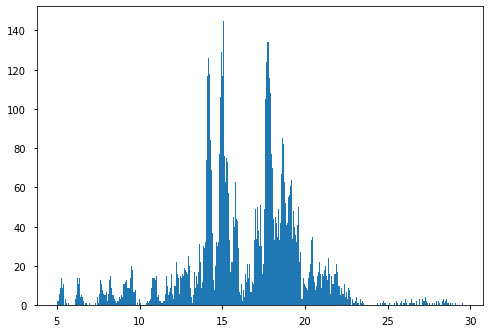

In [89]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z_refine, bins=400)

In [90]:
sort_refine_z = np.sort(z_refine)
refine_mid = sort_refine_z[int(sort_refine_z.size/2)]
refine_mid

16.950277328